<a href="https://colab.research.google.com/github/Srivarshini67/Srivarshini55/blob/main/True_%26_Fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [3]:
train=pd.read_csv('/content/drive/MyDrive/train.csv')

# Data Structure and Content

In [4]:
train.shape

(20800, 5)

In [5]:
test.shape

(5200, 4)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
train.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [8]:
train.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [11]:
test.isnull().sum()

,0
id,0
title,122
author,503
text,7


In [12]:
test.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [13]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Text or Data Preprocessing



1.   Removing the null values



In [14]:
train=train.fillna(' ')

In [15]:
train.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [16]:
test=test.fillna(' ')

In [17]:
test.isnull().sum()

,0
id,0
title,0
author,0
text,0


In [18]:
train['subject']=train['author'] + ' ' + train['title']

In [19]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


# Tokenization

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject'].apply(word_tokenize)

In [22]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


# Lowercasing the text

In [23]:
train['tokens']=train['subject'].str.lower()

In [24]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jailed for fictio...


# Removal of punctuation



In [25]:
train['subject']=train['subject'].str.replace('[^\w\s]',' ')

In [26]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jailed for fictio...


# Removal of stop words

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords

In [29]:
sw=set(stopwords.words('english'))
print(sw)

{'which', 'didn', 'so', 'd', 'with', 'all', 'had', 'they', 'few', 'me', 'your', 'at', 'once', 'theirs', "shouldn't", 'between', 'i', 'itself', 'each', 'wasn', 'both', 'own', 'should', 'shan', 'ourselves', 'because', 'was', 'needn', 'there', 'down', 'against', 'some', 'off', 'that', "isn't", 'who', 'on', 'what', 'won', 'wouldn', 'any', 'by', 'from', 'under', "you'd", 'hadn', 've', 'm', 'is', "you're", 'other', 'isn', 'were', "won't", "shan't", 'too', 'has', 'again', "aren't", "wouldn't", 'shouldn', 'about', 'nor', 'our', 'do', "doesn't", 'out', "don't", 'my', 'an', 'further', "couldn't", 'most', 'its', 'as', 'ma', 'haven', 'are', 'but', "that'll", "hadn't", 'how', 'you', "you'll", 'then', "hasn't", 'don', "mightn't", 'very', 'them', 'no', 't', 'for', 'hers', "she's", 'to', 'couldn', "needn't", 'why', 'am', 'through', "should've", 'only', 'more', 'yourselves', "didn't", 'over', 'if', 'herself', 'after', 'he', 'can', 's', 'she', 'a', 'doing', 'his', 'where', 'not', 'yourself', 'their', 't

In [30]:
train['subject'] = train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [31]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why Truth Might Get You Fired,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed fictional ...,howard portnoy iranian woman jailed for fictio...


# Stemming or lammatization

In [32]:
from nltk.stem import PorterStemmer

In [33]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [34]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aide: we didn’t even see ...,darrell lucus house dem aide: we didn’t even s...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillari clinton, big wo...","daniel j. flynn flynn: hillary clinton, big wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com whi truth might get you fire,consortiumnews.com why the truth might get you...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilian kill in singl us a...,jessica purkiss 15 civilians killed in single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...,howard portnoy iranian woman jailed for fictio...


LOGISTIC REGRESSION Linear Regression: Used to predict a continuous dependent variable (outcome) based on one or more independent variables (features). For example, predicting a person’s weight based on their height and age.

Logistic Regression: Used to predict a categorical dependent variable, typically binary (0 or 1, yes or no). ** For example**, predicting whether a student will pass or fail a course based on study hours and attendance.

 TYPES OF LOGISTIC REGRESSION:
       1.BINOMIAL: ex: yes or No
       2.MULTINOMIAL: have 3 0r more  unordered form
       ex:cat,dog,ant
       3.ORDINAL: 3or more ordered types of dependent variable
       ex: small,medium,high.
           bsc,btech,msc,mbbs
    
    Z=W(omega).X+B
Sigmoid Function (sigma)z=1%1+e^-z

         here we sub Z=W.X+b

# Vectorisation

In [35]:
x=train['subject']
y=train['label']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vt=TfidfVectorizer()
vt.fit(x)

TfidfVectorizer()

In [38]:
x.head()

,subject
0,darrel lucu hous dem aide: we didn’t even see ...
1,"daniel j. flynn flynn: hillari clinton, big wo..."
2,consortiumnews.com whi truth might get you fire
3,jessica purkiss 15 civilian kill in singl us a...
4,howard portnoy iranian woman jail fiction unpu...


In [39]:
x=vt.transform(x)

In [40]:
print(x)

  (0, 20082)	0.18569122923094866
  (0, 19451)	0.2804673354197719
  (0, 19111)	0.2538738023821247
  (0, 16482)	0.22004732789115347
  (0, 11079)	0.31027854590858667
  (0, 10754)	0.249287860827764
  (0, 9699)	0.21150710740076684
  (0, 9602)	0.15421430068784922
  (0, 8839)	0.19084641266521293
  (0, 6440)	0.1991033274381912
  (0, 5260)	0.2538738023821247
  (0, 4999)	0.23355319429348412
  (0, 4767)	0.3071190137274408
  (0, 3956)	0.21064761843798654
  (0, 3407)	0.31373942183885084
  (0, 811)	0.33890878358232296
  (1, 20432)	0.29951908908156866
  (1, 8615)	0.19815023888659125
  (1, 7107)	0.711483310803025
  (1, 4732)	0.26268668599849243
  (1, 3782)	0.19062686807106288
  (1, 3104)	0.3870784468942128
  (1, 2717)	0.15460118725006144
  (1, 2262)	0.2928176012009572
  (2, 20659)	0.2907853396543726
  :	:
  (20797, 11775)	0.2909764068763164
  (20797, 11187)	0.35616902888355706
  (20797, 10438)	0.21986788391240106
  (20797, 9561)	0.13983991167770832
  (20797, 8881)	0.2147112695760861
  (20797, 4818)	0.

In [41]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [44]:
modal=LogisticRegression()

In [45]:
modal.fit(xtrain,ytrain)

LogisticRegression()

In [46]:
ytrpredict=modal.predict(xtrain)

In [47]:
accuracy =accuracy_score(ytrain,ytrpredict)
precision = precision_score(ytrain,ytrpredict)
recall = recall_score(ytrain,ytrpredict)
f1 = f1_score(ytrain,ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:',f1)

 Training Accuracy: 0.9873798076923077
 Training Precision: 0.9797920113448357
 Training Recall: 0.9953181272509004
Training F1 Score: 0.9874940447832301


In [48]:
yttpredict=modal.predict(xtest)

In [49]:
accuracy = accuracy_score(ytest,yttpredict)
precision = precision_score(ytest,yttpredict)
recall = recall_score(ytest,yttpredict)
f1 = f1_score(ytest,yttpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:',f1)

 Training Accuracy: 0.9745192307692307
 Training Precision: 0.956581986143187
 Training Recall: 0.9942390782525204
Training F1 Score: 0.9750470809792845


In [50]:
accuracy = accuracy_score(ytest,yttpredict)
precision = precision_score(ytest,yttpredict)
recall = recall_score(ytest,yttpredict)
f1 = f1_score(ytest,yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:',f1)

 Testing Accuracy: 0.9745192307692307
 Testing Precision: 0.956581986143187
 Testing Recall: 0.9942390782525204
Testing F1 Score: 0.9750470809792845


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

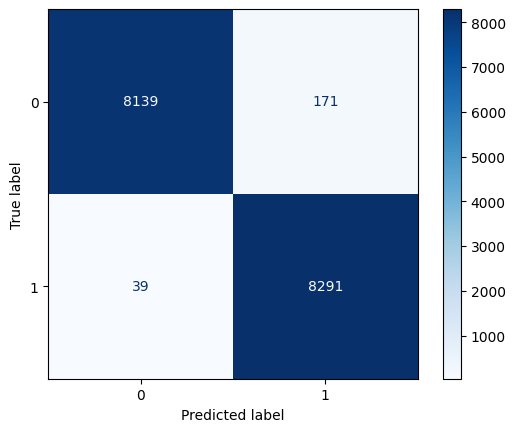

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(ytrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

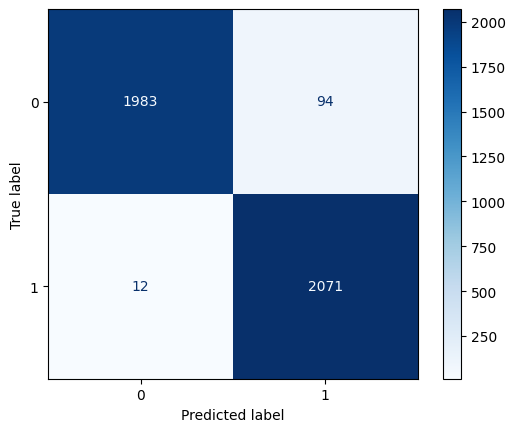

In [53]:
# Generate the confusion matrix
cm = confusion_matrix(ytest,yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

In [54]:
import pickle

In [55]:
# Assuming 'lr' is your trained logistic regression model,
# you need to define or re-train it before saving it.
# For example, if you are using scikit-learn:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# ... (Code to train the model 'lr' here) ...
True_False_Prediction = "True & False Prediction.sav"
pickle.dump(lr, open(True_False_Prediction,'wb'))  # Now 'lr' is defined and can be saved

# SUMMARY

Using Natural Language Processing to Predict Real and False News

This project uses Natural Language Processing (NLP) to analyze text properties including word patterns and sentiment in order to estimate the credibility of news items. The data structure of the application effectively arranges news articles by preserving attributes such as text, labels (real or bogus), and vectorized information, which allows for accurate content analysis.

A crucial part of this project is data preparation, which entails a number of procedures to get the raw data ready for machine learning. Among these stages are:

1. Removing Null Values: To guarantee the quality of the dataset, remove any missing or incomplete data.
2. Tokenization: dividing a text into individual words or phrases in order to conduct a more thorough examination.
3. Lower Casing Text: This technique standardizes text by making all characters lowercase.
4. Removal of Punctuation: Text can be made simpler by removing superfluous punctuation.
5.Removal of Stop Words: Removal common, non-informative words.
6. Stemming or Lemmatization: Reducing words to their root forms for consistency.
7. Vectorization: Converting text into numerical data for model input.

These preprocessing steps enhance data quality, enabling accurate true and fake news classification.